# US Accidents Exploratory Data Analysis

### The Impact of Environmental Factors and the COVID-19 Period on US Car Accidents


### TODO- talk about EDA
#### TODO-talk about the dataset(source,what it contains,how it will be useful)
#### 1.Kaggle
#### 2.Information about accidents
#### 3.can use useful to prevent accidents
####  4.Mention that this dataset does not contain Newyork information

## Table of Contents
#### Introduction
#### Ask
#### Prepare
#### Process
#### Analyze
#### Share


# Data Preparation and Cleaning

#### 1.Import libraries
#### 2.Load the file using Pandas
#### 3.Look at some information about data and columns
#### 4.Fix any incoorect and missing values

## Introduction
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data.

Personally, I'm interested in doing an exploratory data analysis on how different factors might cause car accidents. I will use this US-Accidents dataset to extract cause that contribute to car accidents and how different factors affect the severity of the accidents differently. Additionally, I'll study traffic behavior and accidents espcially during COVID-19 period.




### Ask
What topic are we exploring?

US car accidents; causality analysis; the environmeantla casue behind car accidents; the traffic behavior and accidents during COVID-19.

What is the problem we are trying to solve?

How do different environmental factors affect the car accidents differently? Does COVID-19 have any impact on traffic behavior and accidents?

What metrics will we use to measure your data to achieve our objective?

I'll use the environmental factors such as temperature, precipitation, windspeed and so on to analyze the impact of environmental factors on car accidents. Meanwhile, I'll use the Start_Time of the accidents, the location (Start_Lng and Start_Lat) of the accidents to help finding other possible insights.

Who are the stakeholders?

The stakeholders will be car insurance issuer and also local transporation safety staffs.

Who is the audience?

People who drive cars and those who have the power to make adjustments and concern the safety of drivers.

My hypothesis

Cold weathers, high precipitation, low visibility has a strong relation with the number of traffics, where low visibility has the most number of severe accidents.

COVID-19 has an impact on traffic, and it makes the number of accidents fewer.




In [2]:
import pandas as pd


In [175]:
dataset=pd.read_csv("US_Accidents_Dec21_updated.csv")
dataset.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


#### Shape attribute:Tell us the total number of rows and columns

In [187]:
dataset.shape

(2845342, 47)

2845342 total number of rows and 47 columns

### Checking Null values

In [181]:
dataset.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [182]:
missing_percentage=dataset.isnull().sum().sort_values(ascending=False)/len(dataset)
missing_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [183]:
missing_percentage[missing_percentage!=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot:>

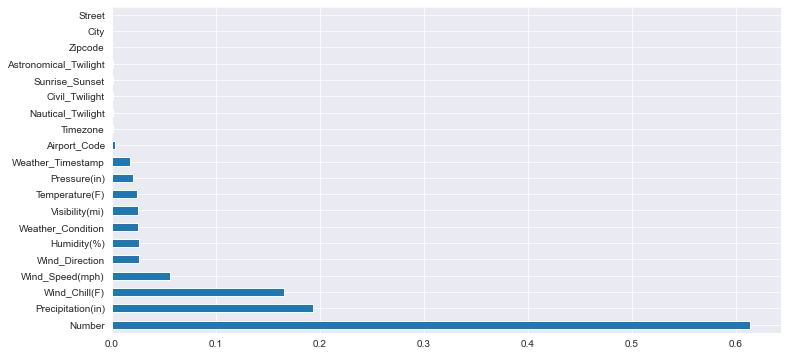

In [184]:
missing_percentage[missing_percentage!=0].plot(kind='barh',figsize=(12,6))

#### 2.info():Info function tell us the information of the dataset like columns ,columns datatype,total rows and columns.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

#### 3. Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of 

#### numeric values. When this method is applied to a series of string, it returns a different output.



In [6]:
dataset.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


## Insights-
#### This tells us that majority of the accidents (> 75%) had a severity rating of ~2 i.e. the traffic was not highly impacted.
#### The average length of the road extent affected by the accidents was ~0.6 miles. So, there was almost no traffic disturbance.
#### Accidents took place despite having average visibility of ~9 miles. This could mean that low visibility was not a reason.
#### About 75% of the accidents, no precipitation was reported. This could mean that rain was not a problem.


## Process
We will clean the data and extract what we need for the analysis.

Since we are only interested in how environmental factors and COVID-19 periods affect the traffic, We will only keep the following columns: ID, Start_Time, Start_Lat, Start_Lng, City, Temperature(F), Wind_Speed(mph), Humidity(%), Precipitation(in), Visibility(mi), Weather_Condition and drop the remaining columns for cleaner analysis. These other factors also have a large portion being null, so they are not very helpful for the analysis.

The first step is to fill the appropriate values in the columns with Null values. Depending on the distribution and the number of Nulls, I deploy different methods to clean the dataset.

In [117]:
dataset= dataset.drop(columns=["End_Time","End_Lat",'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street','Side', 'County', 'State', 'Zipcode', 'Country', 'Timezone','Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)', 'Pressure(in)', 'Wind_Direction','Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
                     'Astronomical_Twilight'])

In [174]:
dataset.isnull().sum()

ID                        0
Severity                  0
Start_Time                0
Start_Lat                 0
Start_Lng                 0
City                    137
Temperature(F)        69274
Humidity(%)           73092
Visibility(mi)        70546
Wind_Speed(mph)      157944
Precipitation(in)    549458
dtype: int64

## Exploratory Data Analysis

### Distribution of Accidents Temperature

<AxesSubplot:title={'center':'\n Distribution of Accidents Temperatue  \n'}, xlabel='\n Temperature(F) \n', ylabel='\n Density \n'>

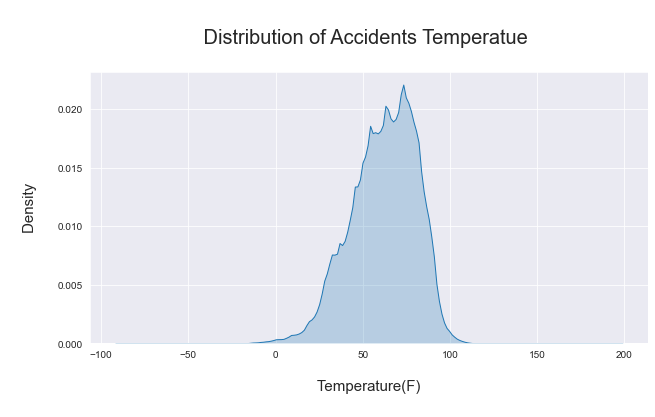

In [118]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Temperatue  \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)
sns.kdeplot(data=df["Temperature(F)"],shade=True)


### Distribution of Accidents Visibility

<AxesSubplot:title={'center':'\n Distribution of Accidents Visibility \n'}, xlabel='\n Visibility(mi)\n', ylabel='\n Density \n'>

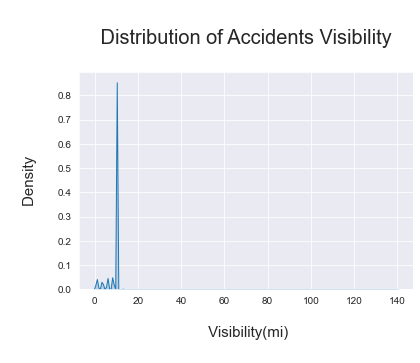

In [119]:

plt.title('\n Distribution of Accidents Visibility \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Visibility(mi)\n', fontsize=15)
sns.kdeplot(data=df["Visibility(mi)"],shade=True)


Since temperature has less than 10% null values of the total number of values and they appear to be 
normally distributed. It might be a good idea to fill these empty data with the mean value. 
Whereas for Visibility(mi), it's right skewed. So replacing null values with a median value is more suitable.



In [120]:
df['Temperature(F)']=df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Visibility(mi)']=df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())


In [121]:
df["Weather_Condition"].value_counts()


Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

 Since there are 127 types of weather condition and it's hard to differentiate and many 
of them can be consider as one big category. It's better to drop the column.



In [124]:
dataset=dataset.drop(columns=["Weather_Condition"])

### Distribution of Accidents Precipitation

<AxesSubplot:title={'center':'\n Distribution of Accidents Precipitation \n'}, xlabel='\n Precipitation(in) \n', ylabel='\n Density \n'>

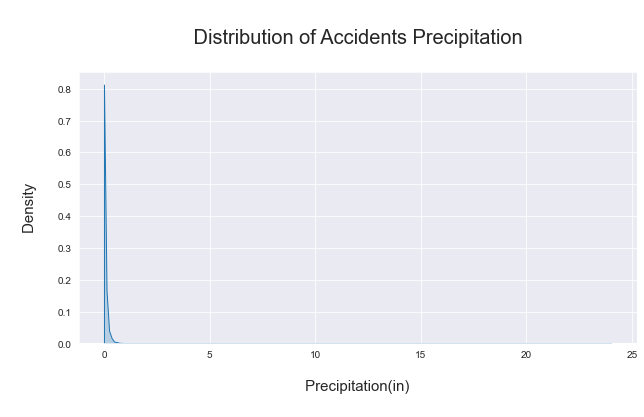

In [125]:

plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Precipitation \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Precipitation(in) \n', fontsize=15)
sns.kdeplot(data=df["Precipitation(in)"],shade=True)


### Distribution of Accidents Humidity

<AxesSubplot:title={'center':'\n Distribution of Accidents Humidity \n'}, xlabel='\n Humidity(%) \n', ylabel='\n Density \n'>

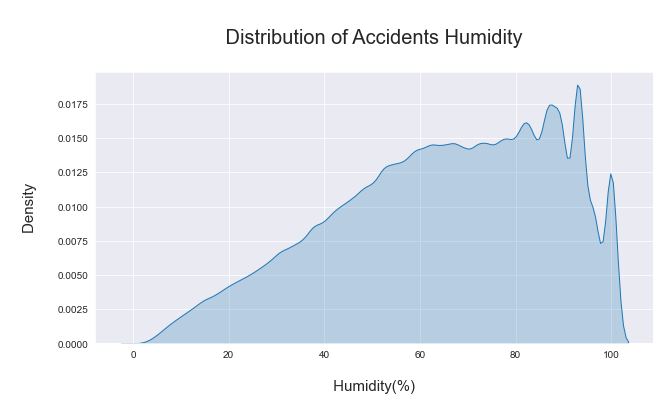

In [126]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Humidity \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Humidity(%) \n', fontsize=15)
sns.kdeplot(data=df["Humidity(%)"],shade=True)

In [127]:
df['Precipitation(in)'].value_counts()
df["Wind_Speed(mph)"].value_counts()
df["Wind_Speed(mph)"].value_counts() ### 7.3950442026078775
df['Precipitation(in)'].mean() ### 0.007016939880237856
df["Wind_Speed(mph)"].isnull().sum() ### 157944
df["Precipitation(in)"].isnull().sum() ### 549458


549458

In [ ]:
Since Precipitation(in), Wind_Speed(mph) have an right skewed distribution.
It's better to use mode value to fill the Null value in these two columns.
Humidity(%) though has a left skwed distribution. I still used the mode value to fill out the Null. 
It may not be accurate to fill out the Null value based on the previous or latter adjacent value, 
as every two accidents were hardly related.



In [129]:
df['Precipitation(in)']=df['Precipitation(in)'].fillna(df['Precipitation(in)'].mode()[0])
df['Wind_Speed(mph)']=df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mode()[0])
df['Humidity(%)']=df['Humidity(%)'].fillna(df['Humidity(%)'].mode()[0])

## Brief Summary/Documentation
We find out that there are several factors such as Street, Zipcode have many missing values. In this case, these factors may not be able to contribute many information in our anlaysis. Since we want to find out how different environmental factors may contribute to the severity and potentially finding out which seems to be more responsible for car accidents. I extract only relevant columns. They are Precipitation(in), Wind_Speed(mph), Temperature(F), Visibility(mi), Humidity(%) and Weather_Condition.

When undertanding these various environmental factors, I first check out the distribution of each. Temperature behaves normally while the other three skewed to the right. For each of these columns, the lack of value only counts less than 20% of total number of data. So it's not advisbale to delete the whole rows that may contain Null value. For Weather_Condition, there are 127 kinds of values that describes the weather and the majority of them only has 1 value. So it's not that useful for our data analysis. Finally, we drop the rows that have missing city because it's hard to infer which city this accident belonged to and unfair to contribute all of the 137 missing city accidents to one or two cities.

Now we have cleaned and adjusted our data properly. I will discover the relationship between the factors and the severity of the car accidents and the number of accidents, the impact of covid on car number of accidents (value_counts) geolocation wise and time period wise.




## Analyze
Things to be analyzed:

Enviornmental Factors Analysis car accidents,
Time Analysis,
Location Analysis

### Environmental Factors Analysis¶


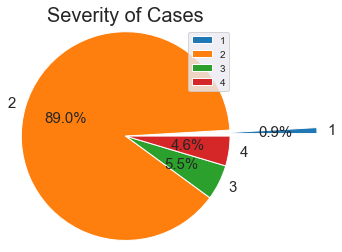

In [132]:
severity_pie = df.groupby('Severity').count()['ID'] ### group by severity in order to do circle map
mylabels = ["1", "2", "3", "4"]
plt.title("Severity of Cases",fontsize=20)
plt.pie(severity_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 15},radius=1.2,explode=(1,0,0,0))
plt.legend(mylabels, loc="best")

### Case Reported for Temperature

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'\n Case Reported for Temperature \n'}, xlabel='Temperature(F)', ylabel='\n Number of Accidents \n'>

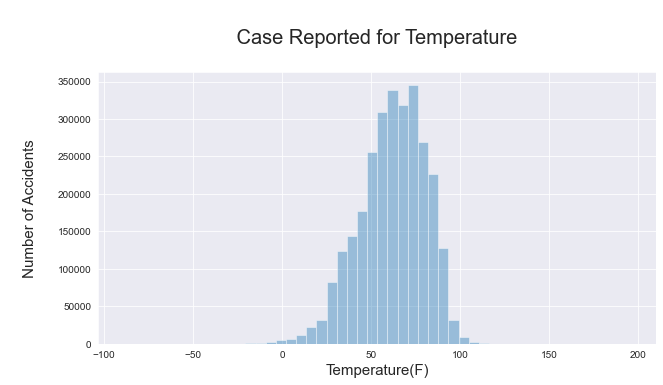

In [135]:
ig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Case Reported for Temperature \n', size=20)
plt.ylabel('\n Number of Accidents \n', fontsize=15)
plt.xlabel('\n Temperature(F)\n', fontsize=15)
sns.distplot(a=df["Temperature(F)"],kde=False) 

### Reported Temperature with Different Severity 

Text(0.5, 6.799999999999994, '\n Temperature(F) \n')

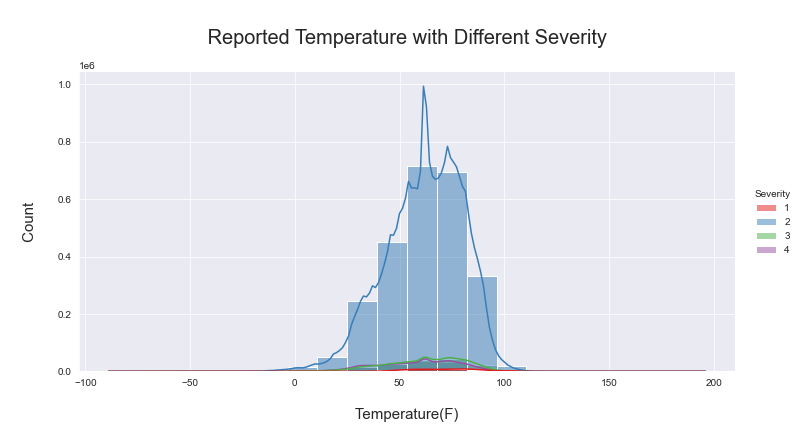

In [137]:
sns.displot(df, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Temperature with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)

### Relationship between Humidity and Severity 

<AxesSubplot:title={'center':'\n Relationship between Humidity and Severity \n'}, xlabel='Severity', ylabel='Humidity(%)'>

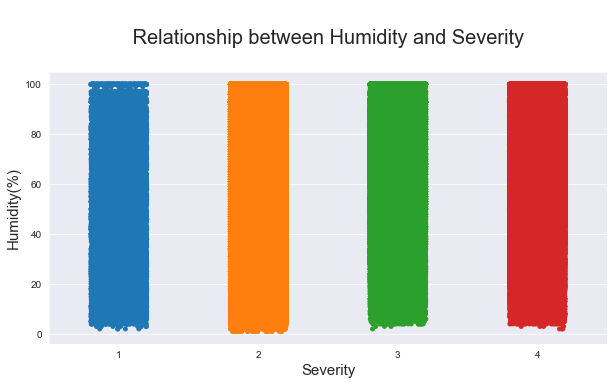

In [138]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Humidity and Severity \n', size=20)
plt.ylabel('\n Humidity(%) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Humidity(%)'],data=df,jitter=0.2)

### Reported Humidity with Different Severity

In [ ]:
sns.displot(df, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Humidity with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Humdity(%) \n', fontsize=15

### Cases Reported for Visibility

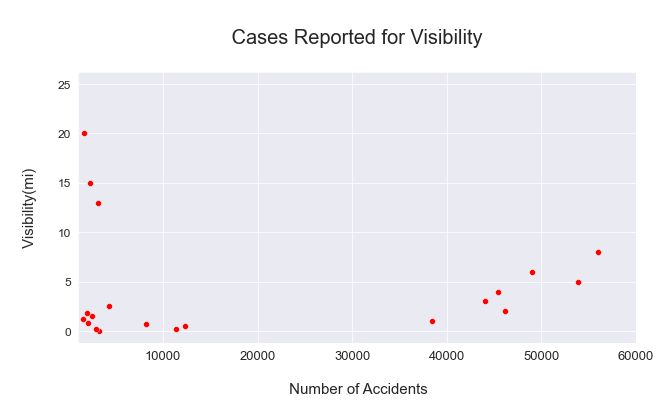

In [139]:
visibility = pd.DataFrame(df["Visibility(mi)"].value_counts()).reset_index().rename(columns={"index":"Visibility","Visibility(mi)":"Cases"})
### recreate a panda data frame
plt.figure(figsize=(10,5))
plt.title('\n Cases Reported for Visibility \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(1000,60000)
a = sns.scatterplot(x=visibility.Cases,y=visibility.Visibility[visibility.Visibility<30],color='red')
plt.show()

### Cases Reported for Precipitation

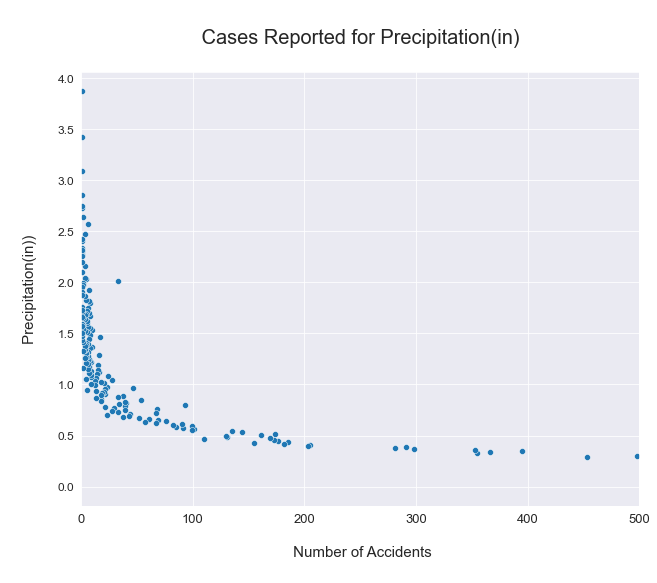

In [140]:
precipitation = pd.DataFrame(df["Precipitation(in)"].value_counts()).reset_index().rename(columns={"index":"Precipitation","Precipitation(in)":"Cases"})
plt.figure(figsize=(10,8))
plt.title('\n Cases Reported for Precipitation(in) \n', size=20)
plt.ylabel('\n Precipitation(in)) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0,500)
a = sns.scatterplot(x=precipitation.Cases,y=precipitation.Precipitation[precipitation.Precipitation<5])
plt.show()

#### How many cases are there with different wind speeds? What's the relationship between the wind speed and severity scors?



<AxesSubplot:title={'center':'\n Relationship between WindSpeed and Severity \n'}, xlabel='Severity', ylabel='Wind_Speed(mph)'>

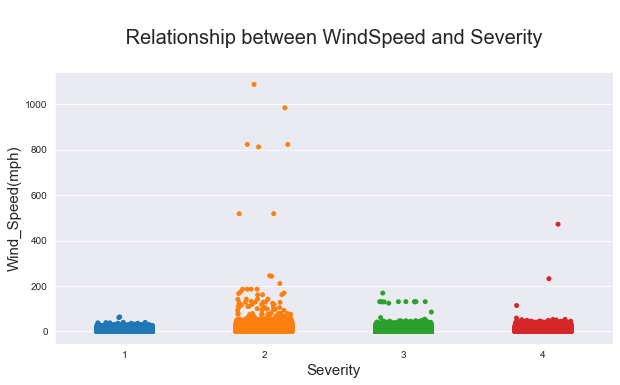

In [143]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between WindSpeed and Severity \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Wind_Speed(mph)'],data=df,jitter=0.2)

### Cases Reported for WindSpeed(mph)

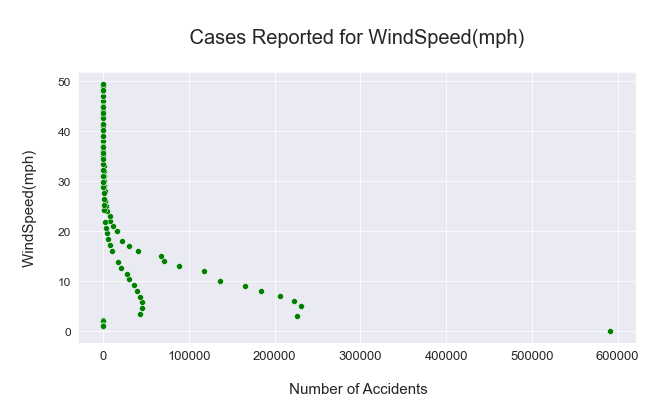

In [144]:
windspeed = pd.DataFrame(df["Wind_Speed(mph)"].value_counts()).reset_index().rename(columns={"index":"Wind_Speed","Wind_Speed(mph)":"Cases"})
plt.figure(figsize=(10,5))
plt.title('\n Cases Reported for WindSpeed(mph) \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=windspeed.Cases,y=windspeed.Wind_Speed[windspeed.Wind_Speed<50],color='green')
plt.show()

## Brief Summary/Documentation
We've just analyzed how different environmental factors might contribute to the number of accidents, how different environmental factors may influence the severity of the accidents.

I have used pie chart, distplot, stripplot, jointplot, scatterplot, and etc to see the relationship between some environmental factors, severity and number of accidents. More conclusions and findings can be see in the last section.

#### How many numeric columns in our dataset

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = dataset.select_dtypes(include=numerics)


In [8]:
df=newdf.columns.tolist()
df

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

## 1.Top 10 Cities has Highest accident rate

In [21]:
df1=cities_accidents.head(10)
df1

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

<AxesSubplot:>

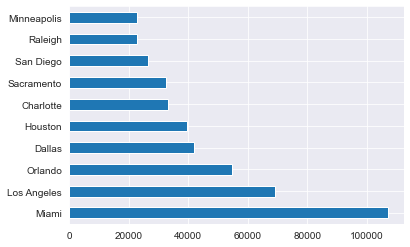

In [116]:
df1.plot(kind='barh')

#### Conclusion:Miami has the highest accidents rate in Top 10 cities

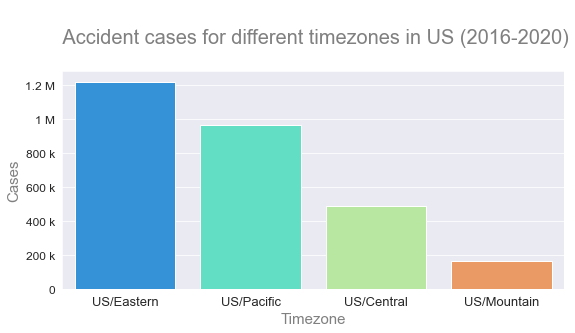

In [113]:
import matplotlib.pyplot as plt
timezone = pd.DataFrame(df.Timezone.value_counts()).reset_index().rename(columns={"index":"Timezone","Timezone":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases for different timezones in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\n Timezone \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=timezone.Timezone , y=timezone.Cases,palette="rainbow")
import matplotlib.ticker as ticker
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

### Top 10 States has the highest accident rate

In [177]:
state_unique=df.State.unique()

In [178]:
state_value=df.State.value_counts().head(10)
state_value

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

<AxesSubplot:>

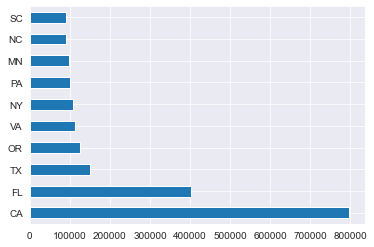

In [179]:
state_value.plot(kind='barh')

conclusion:California(ca) has the highest accidents rate

### Top 10 Accident Prone Streets in US (2016-2020)

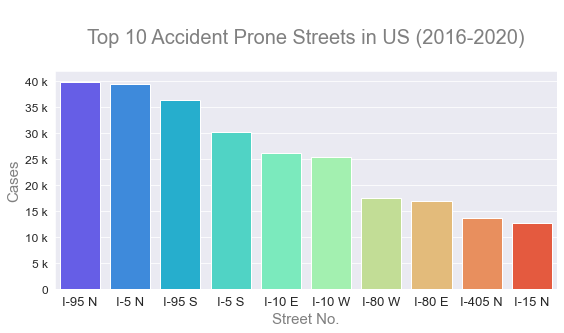

In [114]:
street = pd.DataFrame(df.Street.value_counts().reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'}))
top_street = pd.DataFrame(street.head(10))
plt.figure(figsize=(9,4))
plt.title('\nTop 10 Accident Prone Streets in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\nStreet No.\n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=top_street["Street No."],y=top_street.Cases,palette="rainbow")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

### Distribution :Plot a distributions of cities_accidents to check whether the city has lower number of accidents or higher number of accidents

In [51]:
import seaborn as sns
print(sns.__version__)

sns.set_style("darkgrid")

0.11.2


<AxesSubplot:xlabel='City', ylabel='Count'>

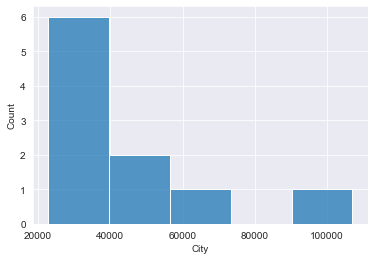

In [25]:
sns.histplot(df1)

#### Conclusion:Most of the cities has accident rate between 20K to 40K in Top 10 cities

###  Find the cities have more than 1000 accidents and less than 1000 accidents

In [27]:
cities_high_accidents=cities_accidents[cities_accidents>=1000]
cities_low_accidents=cities_accidents[cities_accidents<1000]

In [31]:
cities=df['City'].unique()

In [32]:
len(cities_high_accidents)/len(cities)

0.04245848313644924

less than 5% have more than 1000 accidents

In [39]:
len(cities_low_accidents)/len(cities)

0.9574559150830337

less than 96% have less than 1000 accidents

## Time Analysis: car accidents during the COVID-19 period¶


In [145]:
df.Start_Time


0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

## 4.Distribution of  accidents per city

<AxesSubplot:xlabel='City', ylabel='Count'>

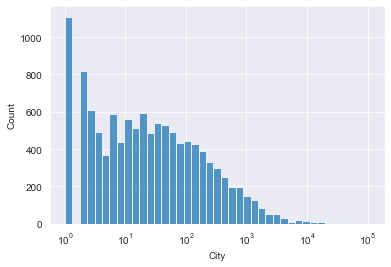

In [33]:
sns.histplot(cities_accidents,log_scale=True)

## 5.What time of the day accidents frequently occur

In [147]:
df.Start_Time=pd.to_datetime(df.Start_Time)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'\n Distribution of Accidents Start Time \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

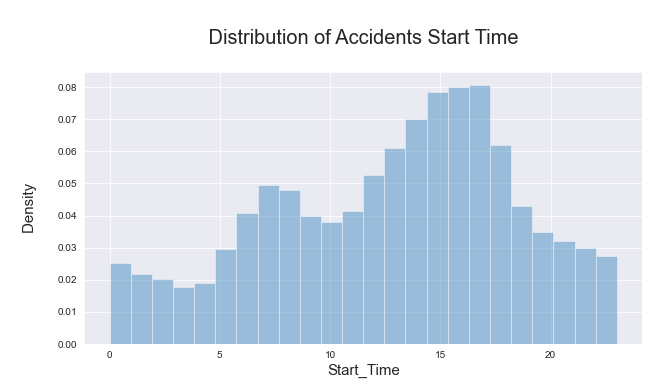

In [152]:

plt.figure(figsize=(10,5))
plt.title('\n Distribution of Accidents Start Time \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24) \n', fontsize=15)
sns.distplot(df.Start_Time.dt.hour,bins =24,kde=False, norm_hist=True)


 A high percentage of accidents occure between 15 to 18. Probably people are hurry to get home. The next highest one is around 6 to 8. This might be due to people going to work.



## 5.What time of the weeks accidents frequently occur

<AxesSubplot:title={'center':'\n Distribution of Accidents Start Day \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

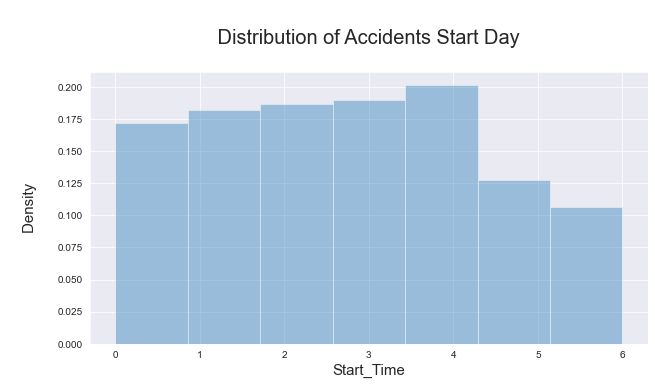

In [153]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Accidents Start Day \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Day) \n', fontsize=15)
sns.distplot(df.Start_Time.dt.dayofweek,bins =7,kde=False, norm_hist=True)

On weekends the number of accidents is lower. Is the distribution of accidents same on weekdays and on weekends?



<AxesSubplot:title={'center':'\n Distribution of Sunday Accidents Start Hour \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

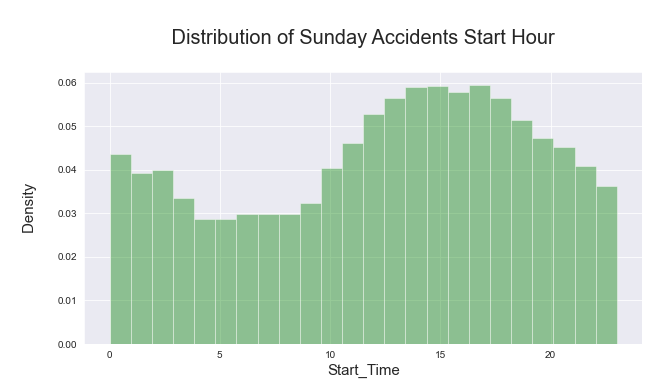

In [155]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Sunday Accidents Start Hour \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24)) \n', fontsize=15)
sundays_accidents= df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sundays_accidents.dt.hour,bins =24,kde=False, norm_hist=True, color='green')

 distribution of Sunday accidents start time is different than the overall start time accidents distribution. Especiallt the density is high at 3 o'clock to 6 o'clockfor sunday accidents.



<AxesSubplot:title={'center':'\n Distribution of Monday Accidents Start Hour \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

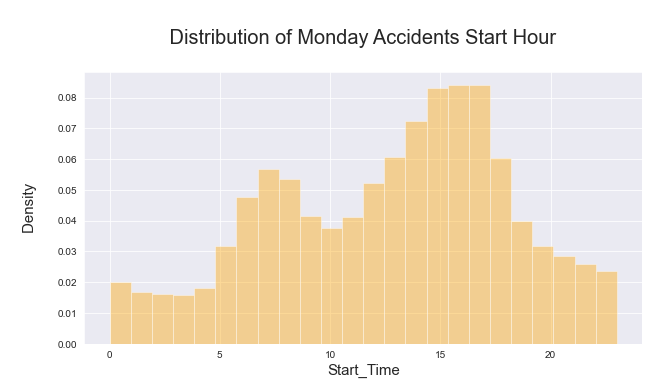

In [157]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Monday Accidents Start Hour \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24) \n', fontsize=15)
monday_accidents=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_accidents.dt.hour,bins=24,kde=False,norm_hist=True,color='orange')

This monday accidents start time distribution is very similar to the overall one.



In [158]:
year_month = df["Start_Time"].groupby(df.Start_Time.dt.to_period("M")).agg('count').reset_index(name='Num_Accidents')
year_month ### Create the panda series for trend plot below and name or reset the value counts column as Num_Accident

,Start_Time,Num_Accidents
0,2016-01,7
1,2016-02,546
2,2016-03,2398
3,2016-04,5904
4,2016-05,7148
...,...,...
67,2021-08,117710
68,2021-09,132475
69,2021-10,144466
70,2021-11,185363


<AxesSubplot:title={'center':'Number of Accidents of 2016-2021 by Months'}, xlabel='Month', ylabel='Number of Accidents'>

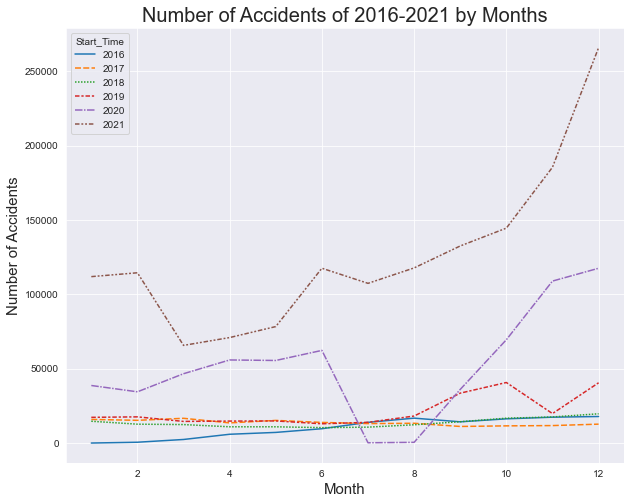

In [160]:
palette = sns.color_palette("tab10", 6)
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Number of Accidents",fontsize=15)
plt.title('Number of Accidents of 2016-2021 by Months',size=20)
sns.lineplot(data=year_month, x=year_month.Start_Time.dt.month, y=year_month.Num_Accidents, hue=year_month.Start_Time.dt.year,
             style=year_month.Start_Time.dt.year, palette=palette)

 We see there's a rising number of car accidents in 2020 and 2021.(Covid-19 period) But is it due to the environmental factors? We may need to have more data related to the number of positive cases, government policies etc.
 But we could check out the yearly environmental influence.

<AxesSubplot:title={'center':'Temperature Variation of 2016-2021 by Months'}, xlabel='Month', ylabel='Temperature level'>

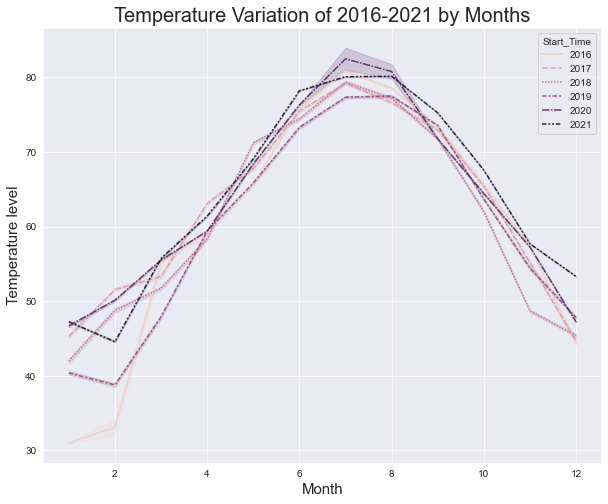

In [163]:
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Temperature level",fontsize=15)
plt.title('Temperature Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Temperature(F)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year)

<AxesSubplot:title={'center':'Humidity Variation of 2016-2021 by Months'}, xlabel='Month', ylabel='Humidity level'>

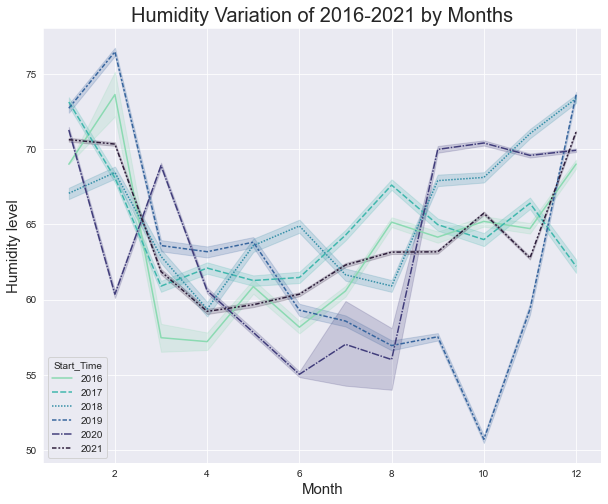

In [176]:
plt.figure(figsize = (10,8))
palette= sns.color_palette("mako_r",6)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Humidity level",fontsize=15)
plt.title('Humidity Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Humidity(%)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year,palette=palette)

<AxesSubplot:title={'center':'Precipitation Variation of 2016-2021 by Months'}, xlabel='Month', ylabel='Precipitation level'>

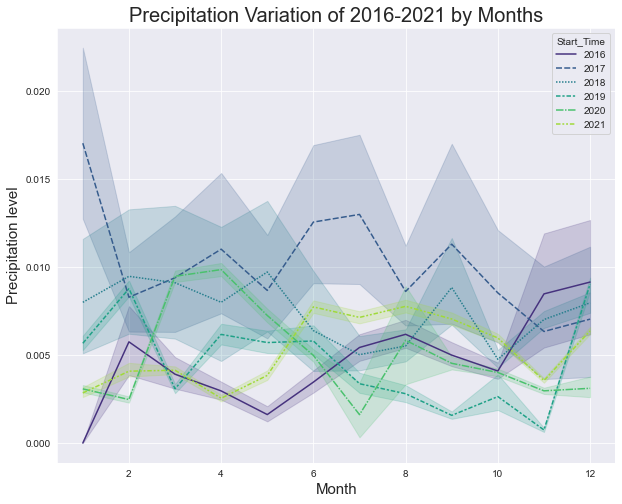

In [164]:
plt.figure(figsize = (10,8))
palette = sns.color_palette("viridis", 6)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Precipitation level",fontsize=15)
plt.title('Precipitation Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Precipitation(in)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year,palette=palette)

it seems like Precipitation level of every year varies drastically. 2017 has the overall highest precipitation level, whereas 2021 and 2020 have the relatively low precipitation level. 2016 has the middle level of precipitation.

In [166]:
!pip install folium

## Location

In [165]:
import folium
from folium.plugins import HeatMap
sample_df= df.sample(int(0.001*len(df)))
lat_lng_pairs= list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))
map= folium.Map([38.552397, -96],zoom_start=6, min_zoom = 5, max_zoom = 13)
HeatMap(lat_lng_pairs).add_to(map)
map


Above is another interesting map that shows where car accidents occur more frequently. Indeed, if we locate to New York City, we don't have any data to show. If we locate to Miami and Los angeles, the number of car accidents is high. East and west coast have the highest number of car accidents, whereas the middle of the states are relatively more 'safe.'

This map may not be able to tell much things about the COVID-19 though. For future work, we might need more information about number of cases and COVID-19 regions in the form of heatmap.

Act

Findings

1.New York State car accidents data is not included in the dataset.

2.Miami is the city with the most number of car accidents.

3.The Temperature is almost normally distributed.

4.Wind Speed, Visibility, Precipitation all follow a right skewed distribution.

5.Humidity on the other hand follows a left skewed distribution.

6.There are 127 types of weather condition in the dataset.

7.he severity of a car accident is described by a scale from 1 to 4. where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
89% of the car accidents are considered a severity of 2. Only 0.9% of car accidents have a severity score of 1.

8.Temperature does not have much of an impact on the severity of the accident. However, extreme weather temperature, like below -50 F degree, usually only causes accidents that have a severity score of 2.
Car accidents are most likely to happen at the temperature around 50-80 F degree.

9.The number of car accidents increases as the humidity increases. The majority of accidents due to humidty has a severity score of 2.

10.Severe car accidents are mostly accompanied with a low visibility (below 50 mi). Meanwhile, The least severe car accidents tend to have the poorest visibility (below 20 mi).

11.Precipitation and the number of accidents have a simple inverse relationship. The heavier the rain, the fewer the number of car accidents.

Precipitation does not affect the severity of the accidents as much as the previous factors. However, during heavy rain(25inch), accidents mostly have a severity score of 2.
12.Wind Speed affects the severity of the accidents almost equally.

13.High wind speed, above 20mph, accompanies with 0 reported car accidents. Low wind speed, below 20 mph, accompanies with more car accidents as it decreases.
A high percentage of accidents occur between 15 to 18. Probably people’r hurry to get home. The next highest one is around 6 to 
On weekends the number of accidents happened at 0 o’clock is higher than weekdays’.

14.Weekday accidents distribution is almost the same as the overall accidents distribution.

15.For every year from 2016-2021, the number of reported car accidents increases. 2021 has the most number of car accidents.

16.Temperature of accident trends of every year are stable.

17.For every year from 2016-2021, humidity trends are stable except during Oct 2019.
2017 being the year with the most precipitation has fewer accidents than 2021 being the year with moderate precipitation.
2021 still has the most number of accidents at every hour. Nevertheless, this may not reflect the reality because 2021 has significantly more reported accidents than in 2016 or previous year. Interestingly, the pattern of each year looks almost identical. Each year's line is just higher than the previous one.

18.During covid 19 months, the number of car accidents has increased significantly. Feb 2020 is the start of COVID.


Answers to the hypothesis

Cold weathers does not have a strong relation with the number of traffics.
Moderate temperatures, 50-80F, correspond with high number of accidents. Extreme weather temperature, higher than 90 or lower than -50, do result in more severe accidents.
Low visibility (<5mi) has a strong relation with the number of accidents. Low visibility affects the severity of accidents almost equally, no matter what the severity score is.

A high precipitation level does not cause more accidents. People may stay at indoors more often when rains are heavy. A high precipitation does cause more severe accidents more often.
A high wind speed does not cause more accident. People may stay at indoors more often when winds are strong. A high wind speed does cause more sever accidents more often.

No matter what the humility level is, it does not hava a strong relation with the severity of accidents. Though most of the reported accidents due to humility have a severity score of 2.
COVID-19 could have some impacts on the increased number of car accidents. Nevertheless, the increased number of car accidents might be due to other factors that are not shown in the dataset. During this COVID-19 period, many factors could account for the increased number of car accidents. COVID-19 is just one of the explanations. During the COVID-19 period, starting from Feb 2020, the number of car accidents increase so much faster and higher than previous years. Since the temperature and humidity level do follow very similar trends across the years, the number of increased car accidents should not be due to these two environmental factors. The precipitation level varies yearly drastically, so it may have some minimal impact on number of car accidents during the COVID-19 period. During the COVID-19 period, people work from home, but the number of accidents at every hour in 2021 is still the highest, so the working from home mode does not decrease the number of car accidents during this COVID-19 period.


Suggestions to the stakeholders
Increase help and resting station for drivers all year round. This is due to most car accidents happened at a normal temperature 50-80F.
Provide benefits for people staying at indoors when the weather has a low visibility. This is due to low visibility results in more car accidents than any other environmental factors.
Give incentives for people who stay off cars during the COVID-19 period. This is due to the work-from-home mode and yearly environmental factors do not contribute to more car accidents.


Reference
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.